In [1]:
client_id = "oXRz7HWebFp6YdQ0YT3PMQ"
api_key = "Mm2MVQluEx7HWKjAMxJQT_KOSB_nKvEeQmjn19VS9PnsOBDoqtegFU1RoBXG0Lum415Eus2bKYuo-eb6mgMm1xV5nhwh3H5uhg-HJN39VFSMjIkwyRCbpLVv7ws7XXYx"

### ----- Helpers--------

In [2]:
# # write a function to make a call to the API
import time
import requests
import pandas as pd
 

def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [3]:
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
#         time.sleep(1) #Wait a second
        cur += 50
    return results

In [6]:
#Testing the function
yelp_call(url_params,api_key)

[{'id': 'ehUuSk5gPTCQmwS_ubgKRA',
  'alias': 'upstate-new-york-2',
  'name': 'Upstate',
  'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/RvnUVU7MF7DT0RzNL-EebQ/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/upstate-new-york-2?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
  'review_count': 1784,
  'categories': [{'alias': 'seafood', 'title': 'Seafood'},
   {'alias': 'wine_bars', 'title': 'Wine Bars'},
   {'alias': 'beerbar', 'title': 'Beer Bar'}],
  'rating': 4.5,
  'coordinates': {'latitude': 40.7263139141197,
   'longitude': -73.9864901976935},
  'transactions': ['restaurant_reservation'],
  'price': '$$',
  'location': {'address1': '95 1st Ave',
   'address2': '',
   'address3': '',
   'city': 'New York',
   'zip_code': '10003',
   'country': 'US',
   'state': 'NY',
   'display_address': ['95 1st Ave', 'New York, NY 10003']},
  'phone': '+16467915400',
  'display_phone': '

In [7]:
term = 'Restaurants'
location = 'New York'
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }

In [8]:
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

19000 total matches found.
20


In [9]:
all_restaurants[0][0]

{'id': 'ehUuSk5gPTCQmwS_ubgKRA',
 'alias': 'upstate-new-york-2',
 'name': 'Upstate',
 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/RvnUVU7MF7DT0RzNL-EebQ/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/upstate-new-york-2?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
 'review_count': 1784,
 'categories': [{'alias': 'seafood', 'title': 'Seafood'},
  {'alias': 'wine_bars', 'title': 'Wine Bars'},
  {'alias': 'beerbar', 'title': 'Beer Bar'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.7263139141197, 'longitude': -73.9864901976935},
 'transactions': ['restaurant_reservation'],
 'price': '$$',
 'location': {'address1': '95 1st Ave',
  'address2': '',
  'address3': '',
  'city': 'New York',
  'zip_code': '10003',
  'country': 'US',
  'state': 'NY',
  'display_address': ['95 1st Ave', 'New York, NY 10003']},
 'phone': '+16467915400',
 'display_phone': '(646) 791-5400',
 'distance

In [10]:
#function to parse the data and keep only the ones to be uploaded in AWS DB
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': parsed_restaurant['price'],'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': "",'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
    return final_parsed_restaurants

In [11]:
#call the function and return a list with only the columns names in SQL
parsed_restaurants_v1 = parse_api(all_restaurants)

In [12]:
len(parsed_restaurants_v1)

1000

In [13]:
parsed_restaurants_v1

[{'restaurant_id': 'ehUuSk5gPTCQmwS_ubgKRA',
  'restaurant_name': 'Upstate',
  'price': '$$',
  'rating': 4.5,
  'review_count': 1784},
 {'restaurant_id': 'ETgJqJHV7BW6pIr9Ox74sA',
  'restaurant_name': 'Amélie',
  'price': '$$',
  'rating': 4.5,
  'review_count': 2565},
 {'restaurant_id': 'jjJc_CrkB2HodEinB6cWww',
  'restaurant_name': 'LoveMama',
  'price': '$$',
  'rating': 4.5,
  'review_count': 4570},
 {'restaurant_id': 'C2o3Iw-DXjoUJFgQIbiqkQ',
  'restaurant_name': 'BoCaphe',
  'price': '$$',
  'rating': 4.0,
  'review_count': 1288},
 {'restaurant_id': 'CwOAKJdX8AMz5iAoA-ZEuA',
  'restaurant_name': 'Uglyduckling',
  'price': '$$',
  'rating': 4.0,
  'review_count': 458},
 {'restaurant_id': '0CjK3esfpFcxIopebzjFxA',
  'restaurant_name': "Joe's Shanghai",
  'price': '$$',
  'rating': 4.0,
  'review_count': 5942},
 {'restaurant_id': 'UA2M9QFZghe-9th2KwLoWQ',
  'restaurant_name': 'Burger & Lobster',
  'price': '$$',
  'rating': 4.0,
  'review_count': 5273},
 {'restaurant_id': 's3jou_L_

In [14]:
df = pd.DataFrame.from_dict(parsed_restaurants_v1)

In [15]:
df.head()

,restaurant_id,restaurant_name,price,rating,review_count
0,ehUuSk5gPTCQmwS_ubgKRA,Upstate,$$,4.5,1784
1,ETgJqJHV7BW6pIr9Ox74sA,Amélie,$$,4.5,2565
2,jjJc_CrkB2HodEinB6cWww,LoveMama,$$,4.5,4570
3,C2o3Iw-DXjoUJFgQIbiqkQ,BoCaphe,$$,4.0,1288
4,CwOAKJdX8AMz5iAoA-ZEuA,Uglyduckling,$$,4.0,458


In [16]:
len(df)

1000

In [17]:
# df.to_excel("Restaurant_1.xlsx")

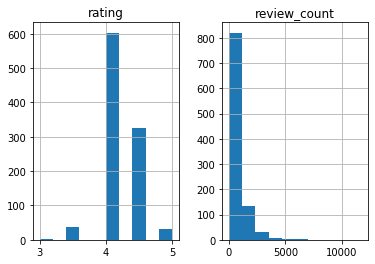

In [19]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

In [20]:
df.head()

,restaurant_id,restaurant_name,price,rating,review_count
0,ehUuSk5gPTCQmwS_ubgKRA,Upstate,$$,4.5,1784
1,ETgJqJHV7BW6pIr9Ox74sA,Amélie,$$,4.5,2565
2,jjJc_CrkB2HodEinB6cWww,LoveMama,$$,4.5,4570
3,C2o3Iw-DXjoUJFgQIbiqkQ,BoCaphe,$$,4.0,1288
4,CwOAKJdX8AMz5iAoA-ZEuA,Uglyduckling,$$,4.0,458


In [21]:
df.price.value_counts(normalize=True)

$$      0.704
$$$     0.115
        0.076
$       0.074
$$$$    0.031
Name: price, dtype: float64

In [22]:
test = pd.read_excel("Restaurant_1.xlsx")

In [23]:
test.head()

,Unnamed: 0,restaurant_id,restaurant_name,price,rating,review_count
0,0,ehUuSk5gPTCQmwS_ubgKRA,Upstate,$$,4.5,1784
1,1,ETgJqJHV7BW6pIr9Ox74sA,Amélie,$$,4.5,2565
2,2,jjJc_CrkB2HodEinB6cWww,LoveMama,$$,4.5,4570
3,3,C2o3Iw-DXjoUJFgQIbiqkQ,BoCaphe,$$,4.0,1288
4,4,CwOAKJdX8AMz5iAoA-ZEuA,Uglyduckling,$$,4.0,458
